# Predict Employee Attrition


In [3]:
!pip install shap

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap

In [6]:
df = pd.read_csv("Employee Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0                4  ...                          False            False   
1                2  ...                          False            False   

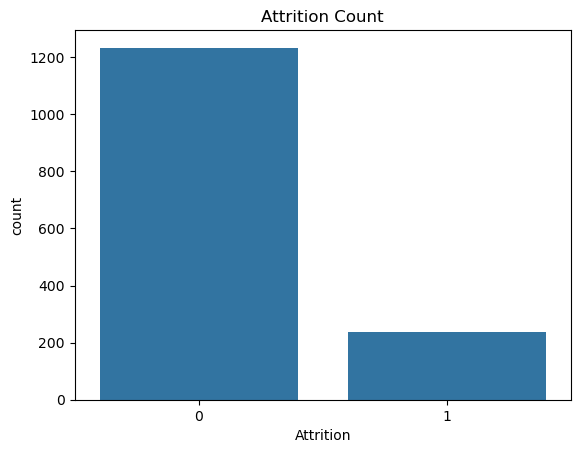

In [14]:
# Step 3: Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df['Attrition'].value_counts())
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Count")
plt.show()

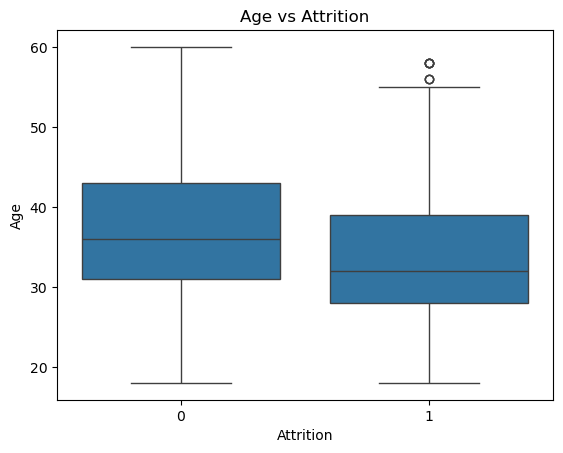

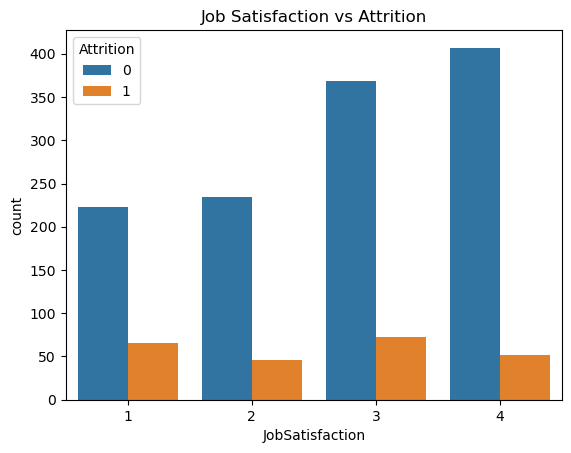

In [15]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()

# Job Satisfaction
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title("Job Satisfaction vs Attrition")
plt.show()

In [20]:
# Step 4: Data Preprocessing
# Drop irrelevant columns if they exist
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Convert target to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop rows where Attrition is NaN (from mapping or missing data)
df = df.dropna(subset=['Attrition'])

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split data
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Ensure there is at least one sample of each class
print("Target class distribution:\n", y.value_counts())

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


Target class distribution:
 Series([], Name: count, dtype: int64)


ValueError: Found array with 0 sample(s) (shape=(0, 44)) while a minimum of 1 is required by SMOTE.

# Model Training :Logistic Regression

In [22]:

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       250
           1       0.91      0.87      0.89       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494


Random Forest Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       250
           1       0.94      0.89      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



## Model Interpretation with SHAP

<Figure size 640x480 with 0 Axes>

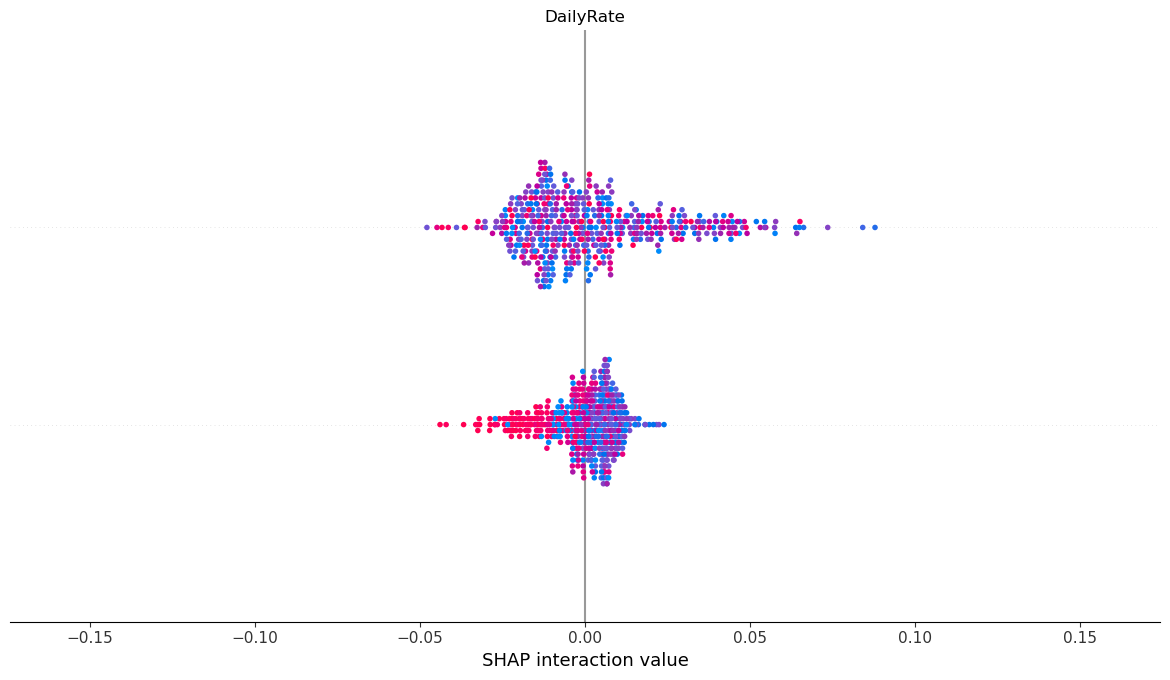

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

In [24]:
# Step 6: Model Interpretation with SHAP
import shap

# Create the SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# If you've scaled X_test, pass the scaled data into SHAP, but ensure the feature names are present
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled_df)

# SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled_df, feature_names=X.columns)

# SHAP decision plot for one example
shap.plots.waterfall(shap_values[0])
